In [1]:
# data managing and display libs
import pandas as pd
import numpy as np
import os
import io

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

# sagemaker libraries
import boto3

In [2]:
# boto3 client to get S3 data
s3_client = boto3.client('s3')
bucket_name='skuchkula-sagemaker-airbnb'

In [3]:
# list the bucket objects
response = s3_client.list_objects(Bucket=bucket_name)

# get list of objects inside the bucket
files = [file['Key'] for file in response['Contents']]
files

['clean/airbnb_clean.csv',
 'detailed_listings.csv',
 'feature_eng/amenities_features.csv',
 'feature_eng/description_features.csv',
 'feature_eng/host_verification_features.csv',
 'feature_eng/merged_features.csv',
 'feature_eng/min_max_scaled_final_df.csv',
 'feature_eng/scaled_final_df.csv',
 'summary_listings.csv']

In [4]:
# download the file from s3
def get_data_frame(bucket_name, file_name):
    '''
    Takes the location of the dataset on S3 and returns a dataframe.
    arguments:
            bucket_name: the name of the bucket
            file_name: the key inside the bucket
    returns:
            dataframe
    '''
    # get an S3 object by passing in the bucket and file name
    data_object = s3_client.get_object(Bucket=bucket_name, Key=file_name)
    
    # information is in the "Body" of the object
    data_body = data_object["Body"].read()
    
    # read in bytes data
    data_stream = io.BytesIO(data_body)
    
    # create a dataframe
    df = pd.read_csv(data_stream, header=0, delimiter=",", low_memory=False, keep_default_na=False)
    
    return df

In [5]:
airbnb_file='feature_eng/min_max_scaled_final_df.csv'

In [6]:
df_airbnb = get_data_frame(bucket_name, airbnb_file)

In [7]:
df_airbnb.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,availability_30,availability_60,availability_90,number_of_reviews,...,description_contains_yankee,description_contains_yard,description_contains_year,description_contains_yellow,description_contains_yoga,description_contains_york,description_contains_young,description_contains_yummy,description_contains_zero,description_contains_zone
0,0.04,0.064516,0.000000,0.025,0.066667,0.000000,0.433333,0.283333,0.344444,0.071987,...,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.04,0.064516,0.071429,0.025,0.066667,0.066667,1.000000,1.000000,1.000000,0.000000,...,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.00,0.064516,0.071429,0.025,0.000000,0.066667,0.000000,0.000000,0.000000,0.014085,...,0.0,0.0,0.00000,0.0,0.137645,0.000000,0.0,0.0,0.0,0.0
3,0.04,0.064516,0.071429,0.025,0.066667,0.333333,0.800000,0.550000,0.700000,0.117371,...,0.0,0.0,0.00000,0.0,0.000000,0.074083,0.0,0.0,0.0,0.0
4,0.04,0.064516,0.071429,0.025,0.000000,0.100000,0.000000,0.000000,0.000000,0.076682,...,0.0,0.0,0.18384,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=50)

In [10]:
pca.fit(df_airbnb)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
features = range(pca.n_components_)

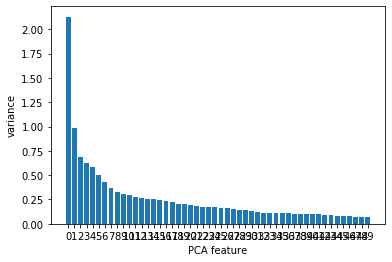

In [12]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [13]:
pca_features = pca.transform(df_airbnb)

In [14]:
pca_features.shape

(45605, 50)

In [15]:
pca_df = pd.DataFrame(pca_features)

In [17]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.658552,-1.455526,0.699093,-0.553412,-0.125384,-0.654187,-0.044713,-0.001357,0.108582,1.333186,...,0.576904,0.466956,0.331311,0.261779,-0.330193,1.620287,0.867739,-0.798060,-0.576860,-0.254925
1,-1.644174,-0.715321,1.097099,0.893833,0.399013,-0.139751,-1.183842,-1.132572,0.996817,0.151908,...,-0.252328,0.226731,0.269839,-0.211928,0.147831,1.354929,0.801862,-0.292820,-0.804985,-0.202175
2,-1.012114,-1.718006,-0.320889,-0.356113,0.113797,0.392780,-0.399569,-0.819086,-0.133456,-0.200684,...,0.193168,0.068044,0.015844,0.197295,-0.167786,1.117572,0.749340,0.109282,-0.870940,-0.278948
3,0.067402,-0.520919,-0.263865,0.353879,-0.907122,-0.906052,-1.158888,-0.624668,-0.071571,0.780228,...,0.416250,-0.057388,0.073780,0.143102,0.198163,1.440193,0.641507,-0.021390,-0.912154,-0.285108
4,-1.666907,1.296202,0.520533,0.659033,1.262238,-0.516450,-0.827510,-0.678685,0.010626,0.180606,...,-0.214280,-0.095810,0.224063,0.083689,-0.192449,0.410582,0.017357,0.246550,0.796558,0.307420


In [18]:
!ls

01_sk_a_look_at_the_data.ipynb
02_sk_geojson_exploration.ipynb
03_sk_data_wrangling.ipynb
04_sk_interactive_plots.ipynb
05_working_with_a_subset.ipynb
06_sk_price_distance_from_transit.ipynb
07_1_sk_price_distribution_five_boroughs.ipynb
07_sk_price_distribution_five_boroughs.ipynb
07_sk_price_distribution_five_boroughs.md
07_sk_price_distribution_five_boroughs_files
08_sk_how_does_price_vary_with_subway_proximity.ipynb
09_sk_step-by-step-approach-for-training-models-on-sagemaker.ipynb
09_sk_step-by-step-approach-for-training-models-on-sagemaker.md
10_sk_t-sne-dimension-reduction.ipynb
11_sk_data_cleaning.ipynb
12_sk_feature_engineering_airbnb.ipynb
13_sk_feature_engineering_airbnb_v2.ipynb
14_sk_PCA.ipynb
15_sk_preprocessing_outliers.ipynb
16_sk_pca_model_local.ipynb
Pop_Segmentation_Solution.ipynb
Untitled.ipynb
airbnb_clean.csv
amenities.html
amenities_features.csv
detailed_listings_without_subset_partially_cleaned.csv
merged_df.csv
midtown.csv
min_max_scaled_final_df.csv
scaled_fin

In [19]:
airbnb_detailed = pd.read_csv('airbnb_clean.csv')

In [20]:
col_names = ["id",
             "name",
             "neighbourhood_cleansed",
             "neighbourhood_group_cleansed",
             "latitude",
             "longitude"
            ]

In [21]:
airbnb_detailed['adjusted_price'] = airbnb_detailed.price / airbnb_detailed.minimum_nights

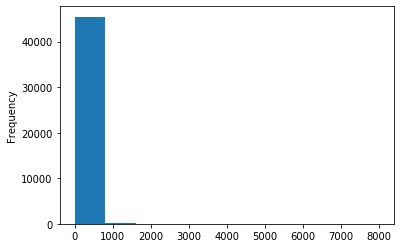

In [22]:
airbnb_detailed.adjusted_price.plot(kind='hist')

In [23]:
airbnb_temp = airbnb_detailed.copy()

In [24]:
low_indexes = airbnb_temp[airbnb_temp.adjusted_price < 50].index
med_indexes = airbnb_temp[(airbnb_temp.adjusted_price >= 50) &
                         (airbnb_temp.adjusted_price < 200)].index
high_indexes = airbnb_temp[(airbnb_temp.adjusted_price >= 200)].index

In [25]:
airbnb_temp.loc[low_indexes, 'price_category'] = 'low'
airbnb_temp.loc[med_indexes, 'price_category'] = 'medium'
airbnb_temp.loc[high_indexes, 'price_category'] = 'high'

In [26]:
airbnb_temp.head()

,id,name,summary,description,host_listings_count,host_total_listings_count,host_verifications,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,...,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_f,require_guest_profile_picture_t,require_guest_phone_verification_f,require_guest_phone_verification_t,adjusted_price,price_category
0,2595,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","Find your romantic getaway to this beautiful, ...",5.0,5.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",Midtown,Manhattan,40.75362,...,0,1,0,0,0,1,0,1,225.000000,high
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,1.0,1.0,"['email', 'phone', 'google', 'reviews', 'jumio...",Harlem,Manhattan,40.80902,...,0,1,0,0,0,1,0,1,50.000000,medium
2,5022,Entire Apt: Spacious Studio/Loft by central park,NaN,Loft apartment with high ceiling and wood floo...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",East Harlem,Manhattan,40.79851,...,0,1,0,0,0,1,0,1,8.000000,low
3,5099,Large Cozy 1 BR Apartment In Midtown East,My large 1 bedroom apartment is true New York ...,My large 1 bedroom apartment is true New York ...,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",Murray Hill,Manhattan,40.74767,...,0,1,0,0,0,1,0,1,66.666667,medium
4,5121,BlissArtsSpace!,NaN,HELLO EVERYONE AND THANKS FOR VISITING BLISS A...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",Bedford-Stuyvesant,Brooklyn,40.68688,...,0,1,0,0,1,0,1,0,1.333333,low


In [27]:
airbnb_temp.price_category.value_counts()

low       25133
medium    18484
high       1988
Name: price_category, dtype: int64

In [28]:
airbnb_detailed.neighbourhood_group_cleansed.value_counts()

Manhattan        20037
Brooklyn         18729
Queens            5469
Bronx             1021
Staten Island      349
Name: neighbourhood_group_cleansed, dtype: int64

In [29]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.658552,-1.455526,0.699093,-0.553412,-0.125384,-0.654187,-0.044713,-0.001357,0.108582,1.333186,...,0.576904,0.466956,0.331311,0.261779,-0.330193,1.620287,0.867739,-0.798060,-0.576860,-0.254925
1,-1.644174,-0.715321,1.097099,0.893833,0.399013,-0.139751,-1.183842,-1.132572,0.996817,0.151908,...,-0.252328,0.226731,0.269839,-0.211928,0.147831,1.354929,0.801862,-0.292820,-0.804985,-0.202175
2,-1.012114,-1.718006,-0.320889,-0.356113,0.113797,0.392780,-0.399569,-0.819086,-0.133456,-0.200684,...,0.193168,0.068044,0.015844,0.197295,-0.167786,1.117572,0.749340,0.109282,-0.870940,-0.278948
3,0.067402,-0.520919,-0.263865,0.353879,-0.907122,-0.906052,-1.158888,-0.624668,-0.071571,0.780228,...,0.416250,-0.057388,0.073780,0.143102,0.198163,1.440193,0.641507,-0.021390,-0.912154,-0.285108
4,-1.666907,1.296202,0.520533,0.659033,1.262238,-0.516450,-0.827510,-0.678685,0.010626,0.180606,...,-0.214280,-0.095810,0.224063,0.083689,-0.192449,0.410582,0.017357,0.246550,0.796558,0.307420


In [30]:
airbnb_temp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45605 entries, 0 to 45604
Data columns (total 69 columns):
id                                                 45605 non-null int64
name                                               45589 non-null object
summary                                            43667 non-null object
description                                        44808 non-null object
host_listings_count                                45605 non-null float64
host_total_listings_count                          45605 non-null float64
host_verifications                                 45605 non-null object
neighbourhood_cleansed                             45605 non-null object
neighbourhood_group_cleansed                       45605 non-null object
latitude                                           45605 non-null float64
longitude                                          45605 non-null float64
accommodates                                       45605 non-null int64
bathrooms    

In [37]:
cols = ['price_category', 'name', 'id', 'price', 'adjusted_price', 
        'minimum_nights', 'bedrooms', 'bathrooms',
        'neighbourhood_group_cleansed', 'neighbourhood_cleansed']

In [38]:
airbnb_reduced = airbnb_temp[cols]

In [39]:
airbnb_final = pd.concat([airbnb_reduced, pca_df], axis=1)

In [40]:
airbnb_final.head()

,price_category,name,id,price,adjusted_price,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,neighbourhood_cleansed,...,40,41,42,43,44,45,46,47,48,49
0,high,Skylit Midtown Castle,2595,225.0,225.000000,1,0.0,1.0,Manhattan,Midtown,...,0.576904,0.466956,0.331311,0.261779,-0.330193,1.620287,0.867739,-0.798060,-0.576860,-0.254925
1,medium,THE VILLAGE OF HARLEM....NEW YORK !,3647,150.0,50.000000,3,1.0,1.0,Manhattan,Harlem,...,-0.252328,0.226731,0.269839,-0.211928,0.147831,1.354929,0.801862,-0.292820,-0.804985,-0.202175
2,low,Entire Apt: Spacious Studio/Loft by central park,5022,80.0,8.000000,10,1.0,1.0,Manhattan,East Harlem,...,0.193168,0.068044,0.015844,0.197295,-0.167786,1.117572,0.749340,0.109282,-0.870940,-0.278948
3,medium,Large Cozy 1 BR Apartment In Midtown East,5099,200.0,66.666667,3,1.0,1.0,Manhattan,Murray Hill,...,0.416250,-0.057388,0.073780,0.143102,0.198163,1.440193,0.641507,-0.021390,-0.912154,-0.285108
4,low,BlissArtsSpace!,5121,60.0,1.333333,45,1.0,1.0,Brooklyn,Bedford-Stuyvesant,...,-0.214280,-0.095810,0.224063,0.083689,-0.192449,0.410582,0.017357,0.246550,0.796558,0.307420


In [41]:
airbnb_final.to_csv('airbnb_final.csv', index=False)

In [45]:
import configparser
config = configparser.ConfigParser()
config.read_file(open('/Users/shravan/projects/interview-prep/credentials.cfg'))

KEY = config.get('AWS','KEY')
SECRET = config.get('AWS','SECRET')

In [46]:
import boto3

# Generate the boto3 client for interacting with S3
s3 = boto3.client('s3', region_name='us-east-1', 
                        # Set up AWS credentials 
                        aws_access_key_id=KEY, 
                        aws_secret_access_key=SECRET)

In [47]:
s3.upload_file(Bucket='skuchkula-sagemaker-airbnb',
              Filename='airbnb_final.csv',
              Key='feature/airbnb_final.csv')

In [110]:
import seaborn as sns

In [111]:
data = airbnb_final[airbnb_final.neighbourhood_cleansed == 'Midtown']

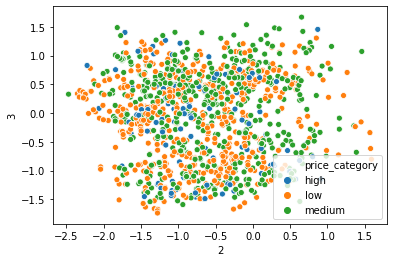

In [116]:
sns.scatterplot(x=data[2], y=data[3], data=data, hue='price_category')

In [118]:
data.to_csv('midtown.csv', index=False)